<a href="https://colab.research.google.com/github/TahyeLehbib/GestionCourrier_Backend/blob/main/FashionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Charger le dataset Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normaliser les valeurs des pixels entre 0 et 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir les labels en one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


4422102/4422102 [==============================] - 0s 0us/step


In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

# Charger le dataset Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normaliser les valeurs des pixels entre 0 et 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir les images en RGB (3 channels)
# Convertir les images en RGB (3 channels)
x_train_rgb = np.array([img_to_array(array_to_img(img.reshape((28, 28, 1))).convert('RGB')) for img in x_train])
x_test_rgb = np.array([img_to_array(array_to_img(img.reshape((28, 28, 1))).convert('RGB')) for img in x_test])


# Redimensionner les images en 32x32 pixels
x_train_resized = tf.image.resize(x_train_rgb, [32, 32])
x_test_resized = tf.image.resize(x_test_rgb, [32, 32])

# Convertir les labels en one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Charger le modèle pré-entraîné VGG16 (sans les couches fully connected)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Geler les premières couches du modèle pré-entraîné
for layer in base_model.layers:
    layer.trainable = False

# Créer un modèle séquentiel et ajouter les couches du modèle pré-entraîné
model = Sequential()
model.add(base_model)
model.add(Flatten())

# Ajouter des couches fully connected pour la classification des vêtements
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compiler le modèle avec l'optimiseur Adam et la perte categorical_crossentropy
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(x_train_resized, y_train, batch_size=128, epochs=10, validation_data=(x_test_resized, y_test), verbose=1)

# Évaluer la performance du modèle
loss, accuracy = model.evaluate(x_test_resized, y_test)
print("Test Accuracy:", accuracy)


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 785s 2s/step - loss: 1.1016 - accuracy: 0.7865 - val_loss: 0.6427 - val_accuracy: 0.8125
Epoch 2/10
469/469 [==============================] - 775s 2s/step - loss: 0.4706 - accuracy: 0.8460 - val_loss: 0.5311 - val_accuracy: 0.8364
Epoch 3/10
469/469 [==============================] - 777s 2s/step - loss: 0.3652 - accuracy: 0.8709 - val_loss: 0.5084 - val_accuracy: 0.8325
Epoch 4/10
469/469 [==============================] - 742s 2s/step - loss: 0.3086 - accuracy: 0.8869 - val_loss: 0.4725 - val_accuracy: 0.8421
Epoch 5/10
469/469 [==============================] - 778s 2s/step - loss: 0.2795 - accuracy: 0.8977 - val_loss: 0.4895 - val_accuracy: 0.8445
Epoch 6/10
469/469 [==============================] - 779s 2s/step - loss: 0.2592 - accuracy: 0.9039 - val_loss: 0.4911 - val_accuracy: 0.8450
Epoch 7/10
469/469 [==============================] - 772s 2s/step - loss: 0.

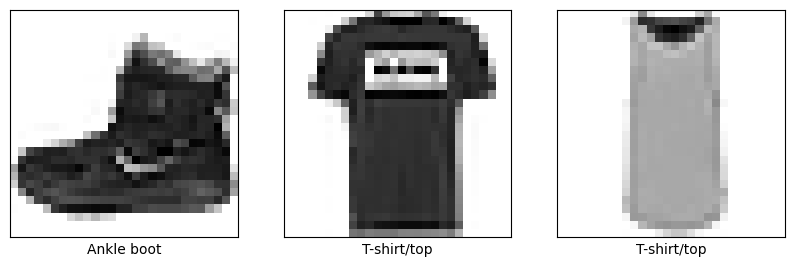

In [6]:
import matplotlib.pyplot as plt

# Définir les classes pour les étiquettes Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Afficher trois images et leurs étiquettes correspondantes
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])

plt.show()


In [9]:
from PIL import Image

# Charger l'image de test
test_image = Image.open("/content/drive/MyDrive/cours_deep_learning/images.jpeg")

# Redimensionner l'image à la taille attendue par le modèle (32x32 pixels)
test_image = test_image.resize((32, 32))

# Convertir l'image en tableau numpy
test_image = np.array(test_image)

# Ajouter une dimension supplémentaire pour représenter le lot (batch)
test_image = np.expand_dims(test_image, axis=0)

# Prédire la classe de l'image
prediction = model.predict(test_image)

# Obtenir l'index de la classe prédite
predicted_class_index = np.argmax(prediction)

# Afficher la classe prédite
print("Predicted class:", class_names[predicted_class_index])



1/1 [==============================] - 0s 195ms/step
Predicted class: T-shirt/top
